# Título

## Objetivos

## Introducción

## Problema de Optimización

### Modelo

Una compañía de producción de cemento tiene $3$ plantas de producción de cemento en la ciudad de Guadalajara, para satisfacer la demanda de 3 obras en 3 zonas diferentes de la ciudad. Las plantas Norte, Sur y Centro pueden producir: $400kg$, $600kg$ y $200kg$ respectivamente al día y las obras 1, 2 y 3 requieren de $500kg$, $300kg$ y $400kg$ de cemento respectivamente al día para poder seguir operando. Los costos, en dólares, asociados al envió de cemento por $kg$ son lo siguientes:   

| - | **Obra 1** | **Obra 2** | **Obra 3** |
|---------------------|:------------------------:|:---------------------:|--------------|
| *Planta Norte* | 8 | 5 | 2 |
| *Planta Sur* | 2 | 3 | 5 |
| *Planta Centro* | 4 | 7 | 8 |   


Para simplificar la notación se utilizarán las siguientes variables:   
$x_1$: Kg de cemento distribuidos de la Planta Norte a obra 1   
$x_2$: Kg de cemento distribuidos de la Planta Norte a obra 2   
$x_3$: Kg de cemento distribuidos de la Planta Norte a obra 3   
$x_4$: Kg de cemento distribuidos de la Planta Sur a obra 1   
$x_5$: Kg de cemento distribuidos de la Planta Sur a obra 2   
$x_6$: Kg de cemento distribuidos de la Planta Sur a obra 3   
$x_7$: Kg de cemento distribuidos de la Planta Centro a obra 1   
$x_8$: Kg de cemento distribuidos de la Planta Centro a obra 2   
$x_9$: Kg de cemento distribuidos de la Planta Centro a obra 3   

El objetivo es satisfacer los requerimientos de cemento de todas las obras, al tiempo que minimice los costos asociados a la distribución.

La función a minizar son los costos de distribución:   
$$\min_{x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9} 8x_1+5x_2+2x_3+2x_4+3x_5+5x_6+4x_7+7x_8+8x_9$$  

Producción Planta Norte:   
$x_1+x_2+x_3\leq400$   

Producción Planta Sur:   
$x_4+x_5+x_6\leq600$   

Producción Planta Centro:   
$x_7+x_8+x_9\leq200$   

Requerimiento Obra 1:   
$x_1+x_4+x_7\geq500$   

Requerimiento Obra 2:   
$x_2+x_5+x_8\geq300$   

Requerimiento Obra 3:   
$x_3+x_6+x_9\geq400$   

### Solúción

In [1]:
import scipy.optimize as opt
import numpy as np

In [2]:
c = np.array([8,5,2,2,3,5,4,7,8])
b = np.array([400,600,200,-500,-300,-400])
A = np.array([[1,1,1,0,0,0,0,0,0],
              [0,0,0,1,1,1,0,0,0],
              [0,0,0,0,0,0,1,1,1],
              [-1,0,0,-1,0,0,-1,0,0],
              [0,-1,0,0,-1,0,0,-1,0],
             [0,0,-1,0,0,-1,0,0,-1]])

In [3]:
sol_cemento = opt.linprog(c,A,b,method='revised simplex')

In [4]:
sol_cemento

     con: array([], dtype=float64)
     fun: 3100.0
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([0., 0., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([  0.,   0., 400., 300., 300.,   0., 200.,   0.,   0.])

El costo mínimo de distribución será de $3100$ dólares.   
Para ello se debe seguir la siguiente distribución:

| - | **Obra 1** | **Obra 2** | **Obra 3** | ***total*** |
|---------------------|:------------------------:|:---------------------:|:---------------------:|--------------|
| *Planta Norte* | - | - | 400kg | 400kg |
| *Planta Sur* | 300kg | 300kg | - | 600kg | 
| *Planta Centro* | 200kg | - | - | 200kg |
| ***total*** | 500kg | 300kg | 400 kg | 1200kg |

## Ajuste de Curvas

In [56]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [57]:
x = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])
y = np.array([54.41,57.295,56.323,62.067,73.753,69.624,81.525,80.006,92.426,86.36,90.115,96.57,100,98.361,100.284,105.573,117.473,129.705,145.84,146.758])

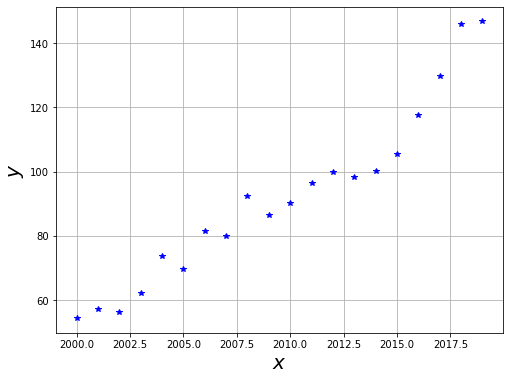

In [58]:
plt.figure(figsize=(8,6))
plt.plot(x,y,'*b')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.show()

In [59]:
x_norm = (x-min(x))/(max(x)-min(x))
y_norm = (y-min(y))/(max(y)-min(y))

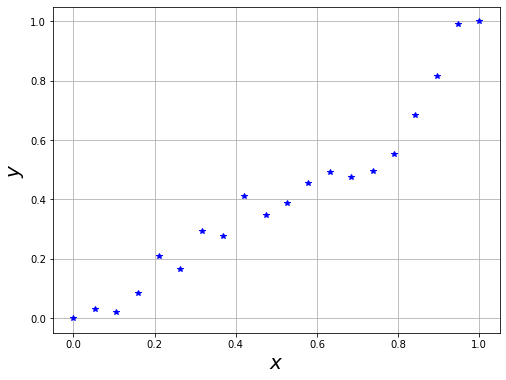

In [60]:
plt.figure(figsize=(8,6))
plt.plot(x_norm, y_norm, '*b')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.grid()
plt.show()

In [61]:
def fun_obj(beta,x,y,n):
    yhat = beta.dot([x**i for i in range(n+1)])
    error = y-yhat
    return np.sum(error**2)

In [77]:
b01 = np.zeros(2)
ajuste1 = opt.minimize(fun_obj, b01, args=(x_norm,y_norm,1))

b02 = np.zeros(3)
ajuste2 = opt.minimize(fun_obj, b02, args=(x_norm,y_norm,2))

b03 = np.zeros(4)
ajuste3 = opt.minimize(fun_obj, b03, args=(x_norm,y_norm,3))

b04 = np.zeros(5)
ajuste4 = opt.minimize(fun_obj, b04, args=(x_norm,y_norm,4))

In [78]:
ajuste1

      fun: 0.11557503636984515
 hess_inv: array([[ 0.24734705, -0.41758017],
       [-0.41758017,  0.78569114]])
      jac: array([2.43075192e-07, 4.74974513e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 2
     njev: 5
   status: 0
  success: True
        x: array([-0.05004192,  0.91901657])

In [79]:
ajuste2

      fun: 0.08276893783486118
 hess_inv: array([[ 0.18538966, -0.72175351,  0.5860392 ],
       [-0.72175351,  3.98301   , -3.71158131],
       [ 0.5860392 , -3.71158131,  3.71158119]])
      jac: array([ 2.79396772e-09, -9.31322575e-10,  1.86264515e-09])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([0.02787634, 0.42553417, 0.49348242])

In [80]:
ajuste3

      fun: 0.046523733982285306
 hess_inv: array([[  0.27766245,  -2.03430184,   3.99568634,  -2.28945418],
       [ -2.03430184,  22.18977743, -50.51969344,  31.2456621 ],
       [  3.99568634, -50.51969344, 123.52448509, -79.77731379],
       [ -2.28945418,  31.2456621 , -79.77731379,  53.04264869]])
      jac: array([ 4.68920916e-07, -2.14343891e-06,  2.78931111e-07,  1.90408900e-06])
  message: 'Optimization terminated successfully.'
     nfev: 90
      nit: 14
     njev: 18
   status: 0
  success: True
        x: array([-0.05543519,  1.57503033, -2.45514654,  1.96575881])

In [81]:
ajuste4

      fun: 0.036315878309901586
 hess_inv: array([[ 3.55973088e-01, -4.16419562e+00,  1.43264478e+01,
        -1.87696584e+01,  8.28853705e+00],
       [-4.16419562e+00,  7.76595678e+01, -3.15548216e+02,
         4.50640306e+02, -2.09862125e+02],
       [ 1.43264478e+01, -3.15548216e+02,  1.38230612e+03,
        -2.06500664e+03,  9.91199439e+02],
       [-1.87696584e+01,  4.50640306e+02, -2.06500664e+03,
         3.17775654e+03, -1.55808228e+03],
       [ 8.28853705e+00, -2.09862125e+02,  9.91199439e+02,
        -1.55808228e+03,  7.76230266e+02]])
      jac: array([-6.03031367e-07,  2.95042992e-06, -8.06525350e-07, -1.46869570e-06,
       -8.64267349e-07])
  message: 'Optimization terminated successfully.'
     nfev: 192
      nit: 28
     njev: 32
   status: 0
  success: True
        x: array([-0.01450689,  0.51073352,  2.62348085, -6.06295601,  4.01439155])

In [82]:
yhat1 = ajuste1.x.dot([x_norm**i for i in range(2)])*(max(y)-min(y)) + min(y)
yhat2 = ajuste2.x.dot([x_norm**i for i in range(3)])*(max(y)-min(y)) + min(y)
yhat3 = ajuste3.x.dot([x_norm**i for i in range(4)])*(max(y)-min(y)) + min(y)
yhat4 = ajuste4.x.dot([x_norm**i for i in range(5)])*(max(y)-min(y)) + min(y)

In [83]:
import matplotlib.pyplot as plt

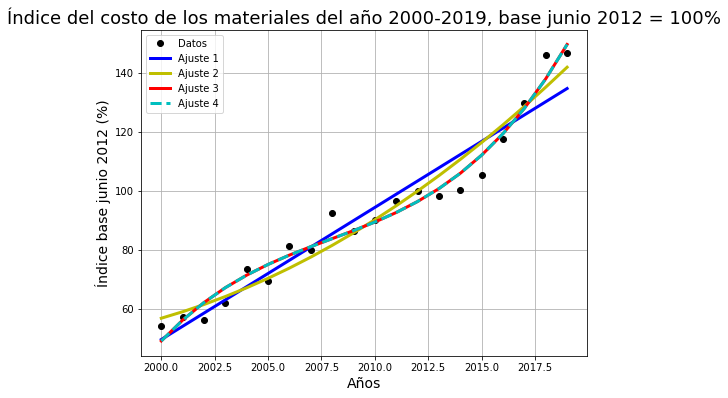

In [99]:
plt.figure(figsize=(8,6))

plt.plot(x, y, 'ok', ms=6, label='Datos')
plt.plot(x, yhat1, 'b', lw=3, label='Ajuste 1')
plt.plot(x, yhat2, 'y', lw=3, label='Ajuste 2')
plt.plot(x, yhat3, 'r', lw=3, label='Ajuste 3')
plt.plot(x, yhat3, 'c--', lw=3, label='Ajuste 4')

plt.title('Índice del costo de los materiales del año 2000-2019, base junio 2012 = 100%',fontsize=18)
plt.xlabel('Años',fontsize=14)
plt.ylabel('Índice base junio 2012 (%)',fontsize=14)

plt.grid()
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'error')

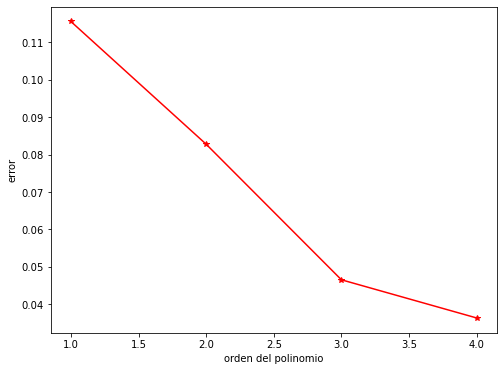

In [90]:
error = [ajuste1.fun, ajuste2.fun, ajuste3.fun, ajuste4.fun]
plt.figure(figsize=(8,6))
plt.plot(range(1,5), error, 'r*-', ms=6)
plt.xlabel('orden del polinomio')
plt.ylabel('error')

De acuerdo a la gráfica anterior podemos notar, que el polinomio que mejor se ajusta es el de tercer grado, ya que es ahí donde se forma el "codo".

Con los polinomios ajustados en el punto anterior, podemos hacer una comparación que estime el índice del costo de los materiales, tomado como base junio de 2012. En 2019, el costo de los materiales tuvo un índice de $146.758\%$.

In [97]:
yhat1[19], yhat2[19], yhat3[19], yhat4[19], y[19]

(134.65807094728086,
 141.85366827613723,
 149.54759324949475,
 153.32791577869054,
 146.758)

Como podemos ver, el polinomio que mejor estima el dato es el de tercer grado, el mismo polinomio que se ajusta más adecuadamente a los datos.